In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
from sklearn.ensemble import RandomForestClassifier
nltk.download('stopwords')
from sklearn.metrics import classification_report,  accuracy_score
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acr18lz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
path="Tweets.csv"
airline_tweets =pd.read_csv(path)

In [3]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


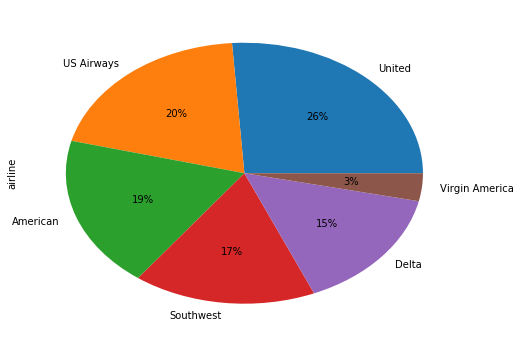

In [5]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

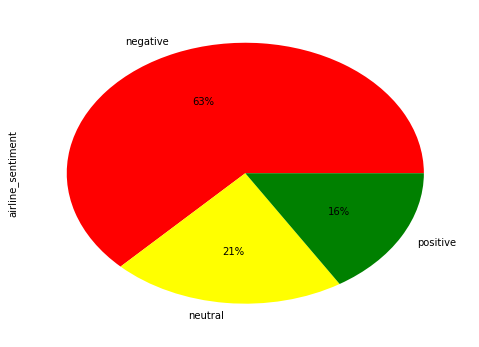

In [6]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

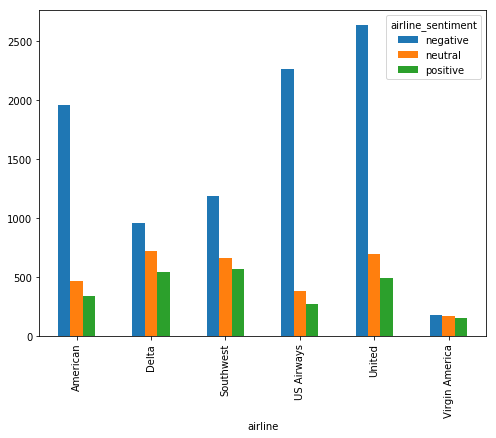

In [7]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

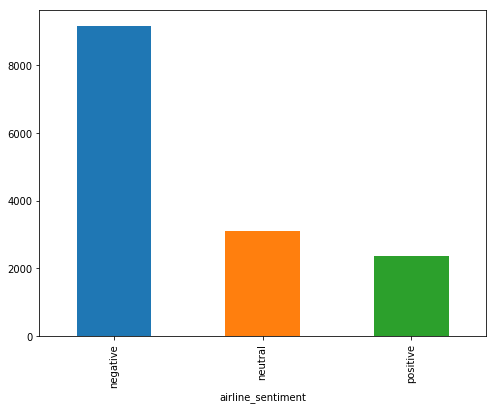

In [8]:
airline_sentiment = airline_tweets.groupby(['airline_sentiment']).text.apply(len)
airline_sentiment.plot(kind='bar')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


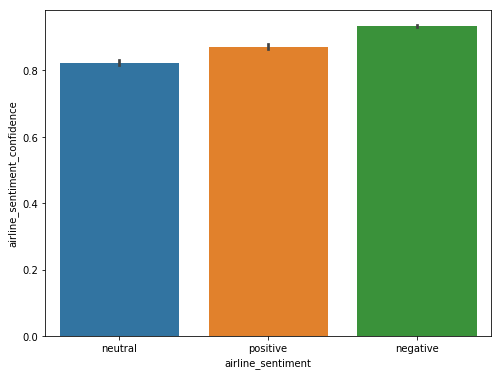

In [9]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

In [10]:
features=airline_tweets.iloc[:,10].values
airline_name=airline_tweets.iloc[:,5].values
labels=airline_tweets.iloc[:,1].values

In [11]:

print(airline_name)

['Virgin America' 'Virgin America' 'Virgin America' ... 'American'
 'American' 'American']


In [12]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features=3500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [14]:
X_train, X_test, y_train, y_test =train_test_split(processed_features,labels,test_size=0.2,random_state=0)

print(X_train)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

#Logistic regression with PCA
logisticClassifier=LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
estimators = [('reduce_dim', PCA(n_components=2500)), ('clf', logisticClassifier)]
pipe = Pipeline([('reduce_dim', PCA(n_components=2000)), ('clf', logisticClassifier)])
pipe.fit(X_train,y_train)

U:\Python36\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=2000,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [18]:

predictions=pipe.predict(X_test)
print(accuracy_score(y_test, predictions))
print(f1_score(y_test,predictions,average='micro'))

0.7476092896174863
0.7476092896174863


In [19]:
#Logistic regression without PCA

Logistic_classifier=LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
Logistic_classifier.fit(X_train,y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [21]:
predictions=Logistic_classifier.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test,predictions,average='micro'))

             precision    recall  f1-score   support

   negative       0.84      0.81      0.83      1870
    neutral       0.50      0.56      0.53       614
   positive       0.62      0.65      0.63       444

avg / total       0.74      0.73      0.73      2928

0.730191256830601
0.730191256830601


In [22]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB=GaussianNB()

GNB.fit(X_train,y_train)
predictions=GNB.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test,predictions,average='micro'))

             precision    recall  f1-score   support

   negative       0.88      0.34      0.49      1870
    neutral       0.28      0.32      0.30       614
   positive       0.24      0.83      0.38       444

avg / total       0.66      0.41      0.43      2928

0.4094945355191257
0.4094945355191257


In [24]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

MNB=MultinomialNB()
MNB.fit(X_train,y_train)
predictions=MNB.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test,predictions,average='micro'))

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1870
     neutral       0.60      0.55      0.57       614
    positive       0.70      0.67      0.69       444

    accuracy                           0.77      2928
   macro avg       0.71      0.70      0.70      2928
weighted avg       0.77      0.77      0.77      2928

0.7721994535519126
0.7721994535519126


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
print(y_train[1])




0


ValueError: Unknown label type: 'unknown'

In [25]:
#Multinomial Naive Bayes

MNB=MultinomialNB() #naive bayes 不能就直接用pca降维，它需要的是原始数据
pipe = Pipeline([('reduce_dim', PCA(n_components=1500)), ('clf', MNB)])
pipe.fit(X_train,y_train)
predictions=pipe.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test,predictions,average='micro'))

ValueError: Input X must be non-negative

In [17]:
from sklearn.naive_bayes import ComplementNB

CNB=ComplementNB()
CNB.fit(X_train,y_train)
predCNB=CNB.predict(X_test)
print(classification_report(y_test,predCNB))
print(accuracy_score(y_test, predCNB))
print(f1_score(y_test,predCNB,average='micro'))

              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1870
     neutral       0.58      0.59      0.58       614
    positive       0.62      0.75      0.68       444

    accuracy                           0.77      2928
   macro avg       0.69      0.72      0.71      2928
weighted avg       0.77      0.77      0.77      2928

0.7650273224043715
0.7650273224043715


In [21]:
from sklearn import svm

svmClassifier=svm.SVC(gamma='scale',kernel='linear')
svmClassifier.fit(X_train,y_train)
predictions=svmClassifier.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1870
     neutral       0.58      0.57      0.58       614
    positive       0.70      0.66      0.68       444

    accuracy                           0.77      2928
   macro avg       0.71      0.70      0.70      2928
weighted avg       0.77      0.77      0.77      2928

0.76775956284153


In [ ]:
from sklearn import svm
#param_grid = [
#  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]
#svc=svm.SVC()
#clf=GridsearchCV(svc,parameters,cv=5)
svmClassifier=svm.SVC(gamma='scale',kernel='linear')
svmClassifier.fit(X_train,y_train)
predictions=svmClassifier.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
#ensemble the model using voting classifier

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

MNB=MultinomialNB()

svmClassifier=svm.SVC(gamma='scale',kernel='linear')
pipeSVM = Pipeline([('reduce_dim', PCA(n_components=1500)), ('clf', svmClassifier)])
#pipe.fit(X_train,y_train)

text_classifier=RandomForestClassifier(n_estimators=200,random_state=0)

logisticClassifier=LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
pipeLogistic = Pipeline([('reduce_dim', PCA(n_components=2000)), ('clf', logisticClassifier)])

eclassifier=VotingClassifier(estimators=[('logistic',pipeLogistic),('randomforest',text_classifier),('svm',pipeSVM),('naiveBayes',MNB)],voting='hard')
eclassifier.fit(X_train,y_train)

predictions=eclassifier.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test,predictions,average='micro'))

In [22]:
print(y_train[1])
from sklearn.svm import LinearSVC

LiSVM=LinearSVC(random_state=0, tol=1e-5)
LiSVM.fit(X_train,y_train)
predLisvm=LiSVM.predict(X_test)
print(classification_report(y_test,predLisvm))
print(accuracy_score(y_test, predLisvm))

negative
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      1870
     neutral       0.56      0.57      0.56       614
    positive       0.69      0.68      0.69       444

    accuracy                           0.77      2928
   macro avg       0.70      0.70      0.70      2928
weighted avg       0.77      0.77      0.77      2928

0.7663934426229508


In [ ]:
text_classifier=RandomForestClassifier(n_estimators=200,random_state=0)
text_classifier.fit(X_train,y_train)

In [ ]:
predictions=text_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [26]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
pipe.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
union = FeatureUnion([("pca", PCA(n_components=1)),
                      ("svd", TruncatedSVD(n_components=1))])
X = [[0., 1., 3], [2., 2., 5]]
reduced=union.fit_transform(X)  
reduced